# Data Science Nanodegree project 1

##### The information technology (IT) field is one popular field today anmong people who are job seeking. Often one come across adverts online, on the tV or even on the radio on how to secure a a certain tech job with a good salary and have a guaranteed job placement. Given the continued rise in such adverts, one can guess that advertizers are getting positive responses from their listeners. It is on this light that one could be wondering the most rewarding career paths among the many developer jobs. Otherwise tagged 'sexiest' jobs in the IT, these  are the jobs that are most attractive to seekers often due to fat pay and benefits. There is really not a dearth of such lists of top jobs on the web. Howeever, this write-up provides a perspective of top jobs specific to developers. Using a dataset of survey from stack overflow developers in 2017, I made effort to bring out insights that would be useful to anybody considering building a career in the tech. space, and to career advisors who may be wanting to get a better look at such information as top paid developer jobs and the right tools to accumulate for a most satisfying and rewarding career as a developer
##### The dataset utilized are two. One is the survey data itself, and the other is a schema which contains the questions posed for each column in the survey dataset. The survey dataset here referred to as 'df' has many fields/columns which are responses from many stack-overflow developers. The developers come from over 213 countries and reported such information as ther current salaries, how satified they are with their job, years of expereince coding as part of job, among others. I applied exploratory analysis and data visualization in bringing out great insights from this survey that can be helpful to people who are considering career roles in the IT and/or as developers. 

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
col_list = list(df.columns) #list of column names

In [9]:
col_list

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [10]:
schema.head(3) #A look at the schema dataset

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...


In [311]:
##Use below to find out more about the questions posed
XX = schema[schema.Column == 'YearsCodedJob']
XX['Question'].values[0]

'For how many years have you coded as part of your job?'

In [309]:
df.YearsProgram.isnull().sum()

247

In [296]:
#Take a look at the different responses they gave
df.YearsCodedJob.value_counts()

1 to 2 years        5289
2 to 3 years        4767
3 to 4 years        4003
4 to 5 years        3405
20 or more years    3067
Less than a year    3034
5 to 6 years        2990
9 to 10 years       1956
6 to 7 years        1912
10 to 11 years      1678
7 to 8 years        1638
8 to 9 years        1287
15 to 16 years       845
14 to 15 years       840
11 to 12 years       838
12 to 13 years       741
16 to 17 years       694
17 to 18 years       545
13 to 14 years       531
19 to 20 years       427
18 to 19 years       403
Name: YearsCodedJob, dtype: int64

In [328]:
df.Currency.value_counts()

U.S. dollars ($)               7073
Euros (€)                      5849
British pounds sterling (£)    2176
Indian rupees (?)              2176
Canadian dollars (C$)          1062
Polish zloty (zl)               564
Australian dollars (A$)         469
Russian rubles (?)              366
Brazilian reais (R$)            359
Swedish kroner (SEK)            306
Swiss francs                    300
South African rands (R)         174
Mexican pesos (MXN$)            144
Japanese yen (¥)                123
Chinese yuan renminbi (¥)       121
Singapore dollars (S$)           79
Bitcoin (btc)                    67
Name: Currency, dtype: int64

In [298]:
df.shape

(51392, 154)

In [297]:
df.YearsCodedJob.isnull().count()

51392

## What are the sexiest jobs in the information technology industry?

### Part 1: Take a look at different developer_types and their salaries levels

In [ ]:
#dev_sal = df[['DeveloperType','Salary','Country','HaveWorkedLanguage',]]

In [17]:
df.DeveloperType.value_counts()

Web developer                                                                                                                                                                                                                                                                                          10683
Web developer; Desktop applications developer                                                                                                                                                                                                                                                           1849
Mobile developer                                                                                                                                                                                                                                                                                        1556
Web developer; Mobile developer                                                                  

In [65]:
#This will return a list of distinct element among all responses.
def extract_each(dat_df,Column1):
    hy = []
    #dat_df[Column].dropna(axis = 0, how = 'any')
    col_list = list(dat_df[Column].values)
    for i in col_list:
        gt = pd.Series([1])
        #if gt.isnull().any() == True:
            #continue
        gh = str(i).split(';')
        gh = [i.lstrip() for i in gh]
        hy.append(gh)
    hy1 = [i for i in hy for i in i]
    hy1 = pd.Series(hy1).dropna(how = any)
    return hy1

In [90]:
dv = [1,2,3,4]
ft = dv[2]
ty = list(df['DeveloperType'].values)
#   print(k)
gb = [str(i)*3 for i in dv]
gb

['111', '222', '333', '444']

In [93]:
gb = [list(str(i)*3) for i in dv]
gb = [i for i in gb for i in i]
gb

['1', '1', '1', '2', '2', '2', '3', '3', '3', '4', '4', '4']

In [100]:
ty = list(df['DeveloperType'].values)
[ty[2]]*3

['Other', 'Other', 'Other']

In [103]:
#This will return a list of distinct element among all responses.
hy = []
SalLst = []
Cntrylst = []
JobSatLst = []
sal = list(df['Salary'].values)
Cntry = list(df['Country'].values)
JobSat = list(df['JobSatisfaction'].values)
#dat_df[Column].dropna(axis = 0, how = 'any')
col_list = list(df['DeveloperType'].values)
for i,j in df['DeveloperType'].items():
    gh = str(j).split(';')
    gh = [j.lstrip() for j in gh]
    hy.append(gh)
    bs = [sal[i]]*len(gh)
    SalLst.append(bs)
    bj = [JobSat[i]]*len(gh)
    JobSatLst.append(bj)
    bc = [Cntry[i]]*len(gh)
    Cntrylst.append(bc)
hy1 = [i for i in hy for i in i]
SalLst1 = [k for k in SalLst for k in k]
Cntry1 = [h for h in Cntrylst for h in h]
JobSat1 = [n for n in JobSatLst for n in n]

In [130]:
my_df = pd.DataFrame({'DevType':hy1,'Country':Cntry1,'JobSat':JobSat1,'Salary':SalLst1})
my_df.head(20)

,DevType,Country,JobSat,Salary
0,nan,United States,NaN,NaN
1,nan,United Kingdom,NaN,NaN
2,Other,United Kingdom,9.0,113750.0
3,nan,United States,3.0,NaN
4,Mobile developer,Switzerland,8.0,NaN
5,Graphics programming,Switzerland,8.0,NaN
6,Desktop applications developer,Switzerland,8.0,NaN
7,nan,New Zealand,NaN,NaN
8,nan,United States,6.0,NaN
9,Web developer,Poland,7.0,NaN


In [380]:
## I decided to write a function that can be
## used to get an equivalent drop down of responses in a target_column that match the results of
## splitting multiple responses in a given pseudo_column as done above.
## dat_df is the original dataframe containing pseudo and target columns
## pseudo_col is the column with multiple responses in each row, that need to be split
## target_col is the column that need to be mapped/dropped-down to fit the result of such split
## split_by is the seperator symbol between the multiple responses in each row of pseudo_col
## returns a dataframe of the pseudo_col and target_col values that match in length
def drop_down(dat_df, pseudo_col, target_col, split_by):
    TagLst = []
    PseudoLst = []
    Col1 = list(dat_df[pseudo_col].values)
    Col2 = list(dat_df[target_col].values)
    for i,j in dat_df[pseudo_col].items():
        gh = str(j).split(split_by)
        gh = [j.lstrip() for j in gh]
        PseudoLst.append(gh)
        bs = [Col2[i]]*len(gh)
        TagLst.append(bs)
    PseudoLst1 = [i for i in PseudoLst for i in i]
    TagLst1 = [i for i in TagLst for i in i]
    return pd.DataFrame({dat_df[pseudo_col].name:PseudoLst1,dat_df[target_col].name:TagLst1})
    return pd.DataFrame({dat_df[pseudo_col].name:PseudoLst1,dat_df[target_col].name:TagLst1})

In [118]:
my_df.isnull().sum()

DevType        0
Country        0
JobSat     12604
Salary     65821
dtype: int64

In [126]:
my_df.shape

(92526, 4)

In [132]:
my_df = my_df[my_df.DevType != 'nan'] #Remove all 'nan' answers for developers since they are not recognized as NaN

In [133]:
my_df.DevType.value_counts()

Web developer                                            26235
Desktop applications developer                           10435
Mobile developer                                          8326
Database administrator                                    5192
Developer with a statistics or mathematics background     4091
Systems administrator                                     4086
DevOps specialist                                         4015
Embedded applications/devices developer                   3352
Data scientist                                            3045
Other                                                     2694
Graphics programming                                      1731
Graphic designer                                          1426
Machine learning specialist                               1379
Quality assurance engineer                                1252
Name: DevType, dtype: int64

In [143]:
#Select only respondents from the US
#This is to keep the salaries in the same currency, and avoid ambiguous comparism
US_df = my_df[my_df.Country == 'United States']
US_df = US_df.dropna(subset = ['JobSat','Salary'], how = 'any')#Drop all NaN responses in JobSat and Salary columns
US_df = US_df.drop('Country', axis = 1)#The country column in no longer needed

In [144]:
US_df.isnull().sum()

DevType    0
JobSat     0
Salary     0
dtype: int64

In [317]:
US_df.shape

(7751, 3)

In [321]:
US_df['Norm_Sal'] = ((US_df['Salary'] - US_df['Salary'].min())/(US_df['Salary'].max() - US_df['Salary'].min()))*10
#New column to normalize salary column to match JobSat

In [322]:
US_df.head()

,DevType,JobSat,Salary,Norm_Sal
21,Web developer,8.0,130000.0,6.598898
22,Embedded applications/devices developer,8.0,130000.0,6.598898
23,DevOps specialist,8.0,130000.0,6.598898
24,Quality assurance engineer,8.0,130000.0,6.598898
25,Other,8.0,130000.0,6.598898


<Figure size 1512x864 with 0 Axes>

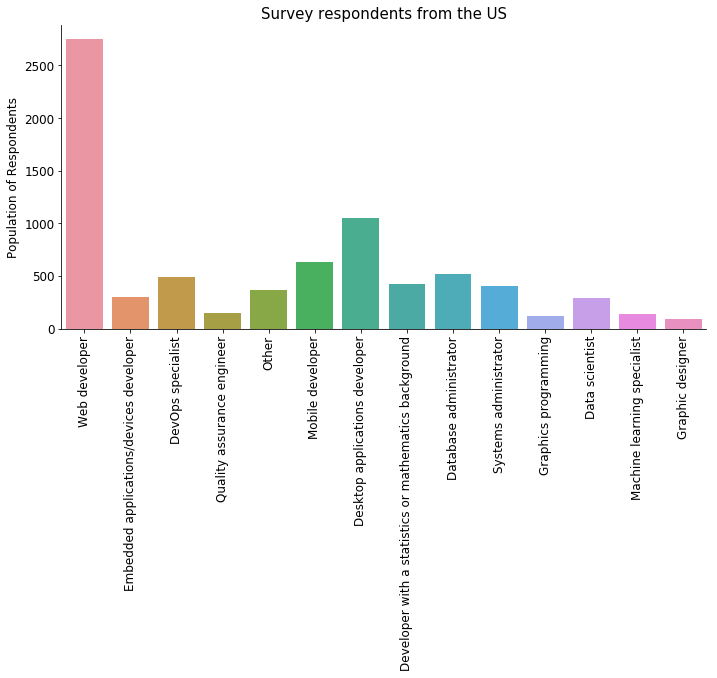

In [401]:
plt.figure(figsize=(21, 12))
chart = sns.catplot(x="DevType", kind="count", data=US_df, aspect = 2)
chart.set_xticklabels(rotation=90, fontsize = 12)
chart.set_yticklabels(fontsize = 12)
chart.set_xlabels('', fontsize = 12)
chart.set_ylabels('Population of Respondents', fontsize = 12)
plt.title('Survey respondents from the US', fontsize = 15)
plt.show()

##### Clearly, web decvelopers are the most populous developer types among survey respondents. followed by desktop application developers, and mobile developers

In [335]:
US_df1 = US_df.loc[:, ['DevType','JobSat']]
US_df2 = US_df.loc[:, ['DevType','Salary']]
#US_df1.set_index('DevType',inplace = True)
#US_df2.set_index('DevType',inplace = True)
US_df1.head()

,DevType,JobSat
21,Web developer,8.0
22,Embedded applications/devices developer,8.0
23,DevOps specialist,8.0
24,Quality assurance engineer,8.0
25,Other,8.0


##### To find out the hottest jobs in the tech. industry, I created a plot of the developer types and their salaries as reported by respondents
##### In addition, I juxtaposed this with the job satisfaction. This was to see if the salaires are an impoortant decider of job satisfaction
##### Take note that the salary was normalized to range from 0 to 10 so as to match the job satisfaction scale.

<Figure size 1512x864 with 0 Axes>

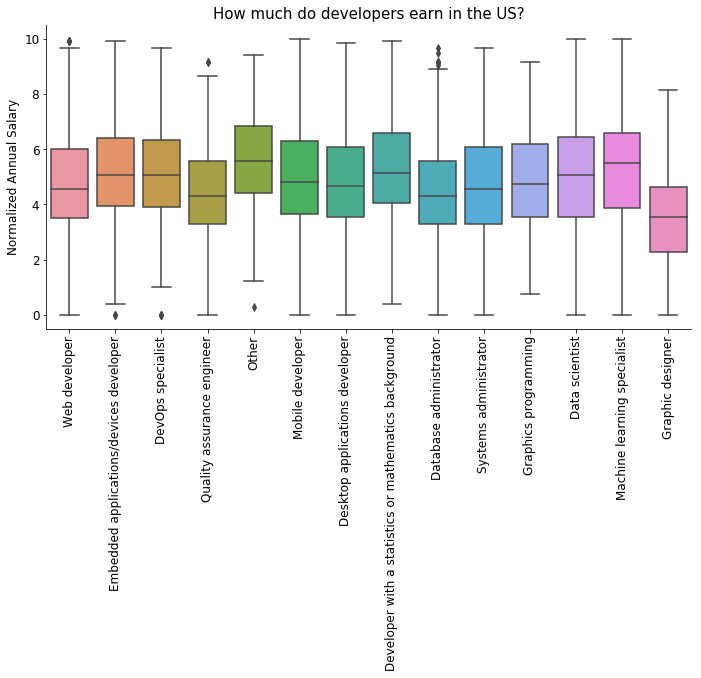

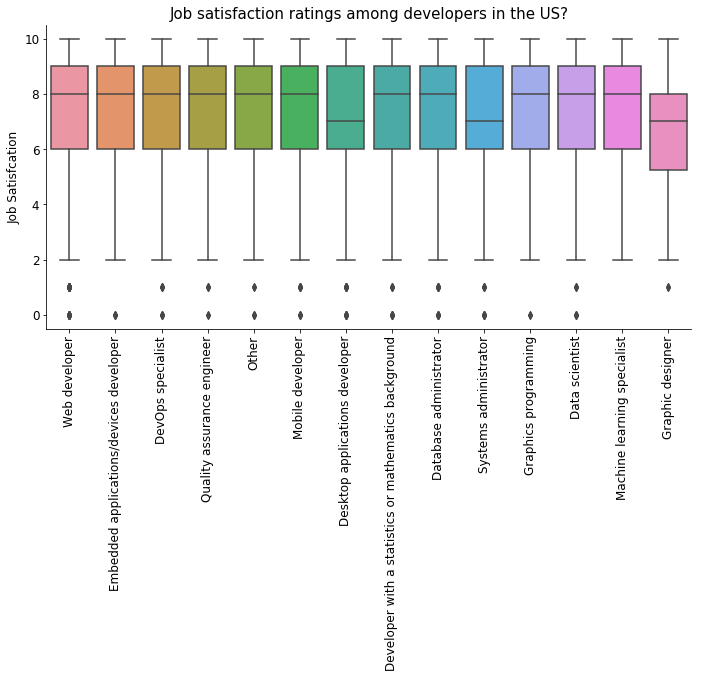

In [405]:
plt.figure(figsize=(21, 12))
chart1 = sns.catplot(x="DevType",y = 'Norm_Sal', kind="box", data=US_df, aspect = 2)
chart1.set_xticklabels(rotation=90, fontsize = 12)
chart1.set_yticklabels(fontsize = 12)
chart1.set_xlabels('', fontsize = 12)
chart1.set_ylabels('Normalized Annual Salary', fontsize = 12)
plt.title('How much do developers earn in the US?', fontsize = 15)
chart2 = sns.catplot(x="DevType",y = 'JobSat',kind="box", data=US_df, aspect = 2)
chart2.set_xticklabels(rotation=90, fontsize = 12)
chart2.set_yticklabels(fontsize = 12)
chart2.set_xlabels('', fontsize = 12)
chart2.set_ylabels('Job Satisfcation', fontsize = 12)
plt.title('Job satisfaction ratings among developers in the US?', fontsize = 15)
plt.show()

##### Plot shows top paid developers as machine Learning Specialists, data scientists, developers with maths and stats. background, devOp specialists, and embeded app./devices developers.
##### Upper bound outliers could be developers with high years of expereince given that such developers as web developers, quality assusrance,and database administrators are traditional IT roles. Lower bound outliers could indicate freelancers.
#### Above results also show that most developers feel pretty satisfied with their job, except for graphic designer. Compared with salaries, only graphic designers have a correlation of low pay and satisfaction

### Part 2:  Is expereince a factor to consider in interpreting the 'Salary' vs 'developer_type' plot above?

In [383]:
new_df1 = pd.concat([drop_down(df,'DeveloperType','Country',';'),drop_down(df,'DeveloperType','Salary',';'), drop_down(df,'DeveloperType','YearsCodedJob',';')], axis = 1)
#new_df1 = new_df.drop(index = [1])
new_df1 = new_df1.loc[:,~new_df1.columns.duplicated()]
new_df1.head(6)

,DeveloperType,Country,Salary,YearsCodedJob
0,nan,United States,NaN,NaN
1,nan,United Kingdom,NaN,NaN
2,Other,United Kingdom,113750.0,20 or more years
3,nan,United States,NaN,9 to 10 years
4,Mobile developer,Switzerland,NaN,10 to 11 years
5,Graphics programming,Switzerland,NaN,10 to 11 years


##### First I tested for database administrators to see if the highest paid have long years of expereince coding.

In [384]:
new_dfUS = new_df1[new_df1.Country == 'United States']
#new_dfUS.isnull().sum()
#new_dfUS.HaveWorkedLanguage.value_counts()
new_dfUS = new_dfUS.dropna(subset = ['Salary'], how = 'any')
new_dfUS.head()

,DeveloperType,Country,Salary,YearsCodedJob
21,Web developer,United States,130000.0,20 or more years
22,Embedded applications/devices developer,United States,130000.0,20 or more years
23,DevOps specialist,United States,130000.0,20 or more years
24,Quality assurance engineer,United States,130000.0,20 or more years
25,Other,United States,130000.0,20 or more years


In [388]:
Test_df = new_dfUS[new_dfUS['DeveloperType'] == 'Database administrator']
Test_df.sort_values(['Salary'], ascending = False, inplace = True)
Test_df.head(10)

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DeveloperType,Country,Salary,YearsCodedJob
39374,Database administrator,United States,190000.0,16 to 17 years
87143,Database administrator,United States,187000.0,20 or more years
39242,Database administrator,United States,180000.0,20 or more years
17921,Database administrator,United States,180000.0,12 to 13 years
71550,Database administrator,United States,180000.0,20 or more years
11573,Database administrator,United States,180000.0,20 or more years
1394,Database administrator,United States,178000.0,16 to 17 years
34412,Database administrator,United States,175000.0,17 to 18 years
20603,Database administrator,United States,175000.0,17 to 18 years
86886,Database administrator,United States,173000.0,13 to 14 years


##### True that the highest paid database administrators have been coding for longer.

##### Now to get a broader view, I plotted expereince vs salary to see if there is a trend.

In [385]:
#US_df1 = new_dfUS.loc[:, ['DevType','JobSat']]
US_df2 = new_dfUS.loc[:, ['YearsCodedJob','Salary']]
#US_df1.set_index('DevType',inplace = True)
#US_df2.set_index('YearsCodedJob',inplace = True)
US_df2.sort_values(['YearsCodedJob'], ascending = True, axis = 0, inplace = True)
US_df2.head(20)

,YearsCodedJob,Salary
49490,1 to 2 years,102000.0
64626,1 to 2 years,74000.0
64625,1 to 2 years,74000.0
87888,1 to 2 years,110000.0
87887,1 to 2 years,110000.0
87886,1 to 2 years,110000.0
31888,1 to 2 years,115000.0
31924,1 to 2 years,100000.0
52491,1 to 2 years,40000.0
52492,1 to 2 years,40000.0


<Figure size 1512x864 with 0 Axes>

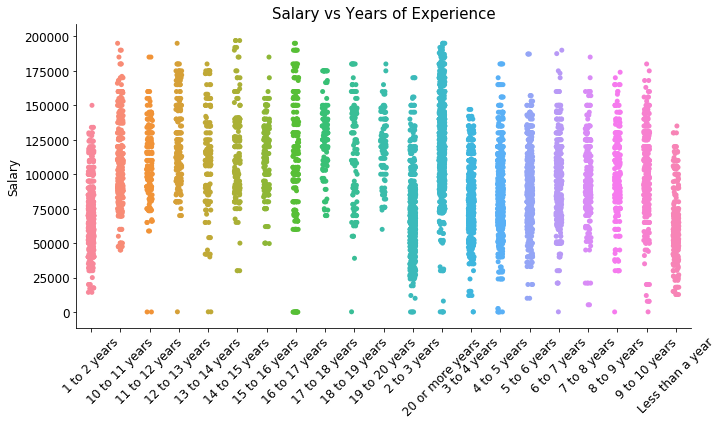

In [410]:
plt.figure(figsize=(21, 12))
chart = sns.catplot(x="YearsCodedJob", y="Salary", data=US_df2, aspect = 2)
chart.set_xticklabels(rotation=45, fontsize = 12)
chart.set_yticklabels(fontsize = 12)
chart.set_xlabels('', fontsize = 12)
chart.set_ylabels('Salary', fontsize = 12)
plt.title('Salary vs Years of Experience', fontsize = 15)
plt.show()

##### It does look like the more experienced a developer is, the higher the pay. Thus my guess about upper bound outliers could be just true

### Part 3: Are there certain tools that top paid developers use?

#### First, I mapped out the tools used by most developers together with their corresponding salaries

In [288]:
#gu = drop_down(df,'HaveWorkedLanguage','Country',';')
new_df = pd.concat([drop_down(df,'HaveWorkedLanguage','Country',';'),drop_down(df,'HaveWorkedLanguage','Salary',';')], axis = 1)
new_df = new_df.drop(index = [1])
new_df = new_df.loc[:,~new_df.columns.duplicated()]
new_df.head(6)

,HaveWorkedLanguage,Country,Salary
0,Swift,United States,NaN
2,Python,United Kingdom,NaN
3,Ruby,United Kingdom,NaN
4,SQL,United Kingdom,NaN
5,Java,United Kingdom,113750.0
6,PHP,United Kingdom,113750.0


In [289]:
new_dfUS = new_df[new_df.Country == 'United States']
#new_dfUS.isnull().sum()
#new_dfUS.HaveWorkedLanguage.value_counts()
new_dfUS = new_dfUS.dropna(subset = ['Salary'], how = 'any')
new_dfUS.head()

,HaveWorkedLanguage,Country,Salary
46,C,United States,130000.0
47,Clojure,United States,130000.0
48,JavaScript,United States,130000.0
49,Matlab,United States,130000.0
50,Rust,United States,130000.0


In [389]:
new_dfUS.shape

(7781, 4)

In [290]:
new_dfUS.HaveWorkedLanguage.value_counts()

JavaScript        2477
SQL               1983
C#                1434
Java              1234
Python            1183
PHP                716
C++                612
Ruby               503
C                  489
TypeScript         392
Objective-C        273
Swift              267
VB.NET             248
Go                 214
Perl               187
nan                178
Scala              159
Groovy             158
R                  151
CoffeeScript       144
Assembly           128
VBA                111
Matlab              98
Lua                 76
Visual Basic 6      73
Clojure             51
Elixir              51
Rust                49
Haskell             45
F#                  40
Erlang              31
Smalltalk           27
Common Lisp         18
Dart                15
Hack                10
Julia                9
Name: HaveWorkedLanguage, dtype: int64

In [265]:
new_dfUS.shape

(13834, 3)

In [272]:
## To select only the top 8 tools that are used by developers in the US
toptools = ['JavaScript', 'SQL','C#', 'Java','Python','PHP','C++','Ruby']
Top_tools_df = new_dfUS[new_dfUS['HaveWorkedLanguage'].isin(toptools)]
#Top_tools_df.HaveWorkedLanguage.value_counts()
Top_tools_df.drop('Country', axis = 1, inplace = True)
Top_tools_df.shape

C:\Users\chiji\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(10142, 2)

#### Count plot of the top tools

<Figure size 1512x864 with 0 Axes>

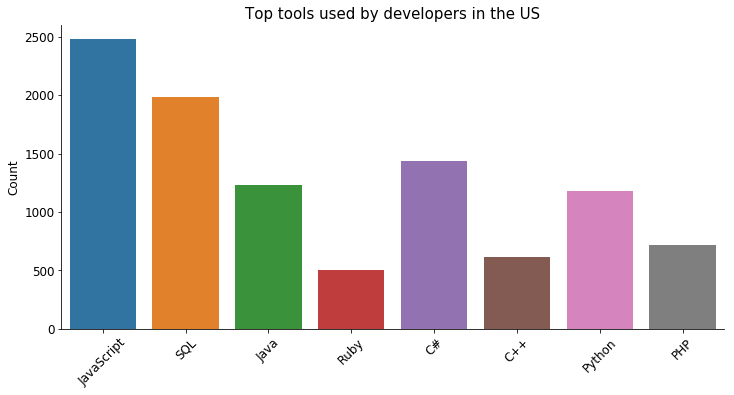

In [407]:
plt.figure(figsize=(21, 12))
chart = sns.catplot(x="HaveWorkedLanguage", kind="count", data=Top_tools_df, aspect = 2)
chart.set_xticklabels(rotation=45, fontsize = 12)
chart.set_yticklabels(fontsize = 12)
chart.set_xlabels('', fontsize = 12)
chart.set_ylabels('Count', fontsize = 12)
chart.set_titles('Top tools used by developers', fontsize = 14)
plt.title('Top tools used by developers in the US',fontsize = 15)
plt.show()

In [ ]:
# Javascript is obviuosly the most among respondents of the survey. This could be connected to the 
# fact that most repondents are web developers. This is followed by SQL and C#

#### Salary vs Tools plot

<Figure size 1512x864 with 0 Axes>

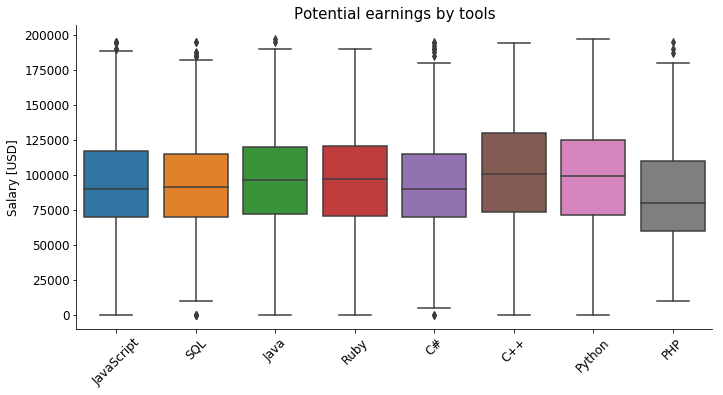

In [409]:
plt.figure(figsize=(21, 12))
chart = sns.catplot(x="HaveWorkedLanguage", y="Salary", kind="box", data=Top_tools_df, aspect = 2)
chart.set_xticklabels(rotation=45, fontsize = 12)
chart.set_yticklabels(fontsize = 12)
chart.set_xlabels('', fontsize = 12)
chart.set_ylabels('Salary [USD]', fontsize = 12)
plt.title('Potential earnings by tools',fontsize = 15)
plt.show()

In [ ]:
##### Topmost paid developers report C++ as the tool they make use of. This is followed by python, then Ruby, and Java.

In [66]:
hu = extract_each(df,'DeveloperType')
hu.value_counts()

Web developer                                            26235
nan                                                      15267
Desktop applications developer                           10435
Mobile developer                                          8326
Database administrator                                    5192
Developer with a statistics or mathematics background     4091
Systems administrator                                     4086
DevOps specialist                                         4015
Embedded applications/devices developer                   3352
Data scientist                                            3045
Other                                                     2694
Graphics programming                                      1731
Graphic designer                                          1426
Machine learning specialist                               1379
Quality assurance engineer                                1252
dtype: int64

In [390]:
hl = extract_each(df,'HaveWorkedLanguage')
#hl.value_counts()